Нейроны - взаимосвязанные нервные клетки головного мозга, которые учавствуют в обработке и передачи электрических и химических сигналов.


Множество входных сигналов поступают в дендритЫ, затем интегрируются в клеточное тело, если накопленный сигнал превышает пороговое значение, то генерируется сигнал, ктороый передаётся дальше по аксонУ.

Дендритов у Нейрона много, а Аксон один , но у Аксона есть отростки, каждый из которых может соединяться с Дендритом. Таким образом с Аксоном может быть соединено несколько дендритов.

PERCEPTRON = perception(восприятие) + automation(автомат).

Персептрон ~ пороговый сумматор.

Если есть два класса {-1, +1}, то сходимость персептрона (достижение устойчивого состояния) гарантируется только если эти два класса ЛИНЕЙНО РАЗДЕЛИМЫ и ТЕМП ОБУЧЕНИЯ достаточно НЕБОЛЬШОЙ.
Если два класса не могут быть разделены линейно, то мы можем установить максимальное число проходов по тренировочному набору данных (ЭПОХ) И/ИЛИ допустимое число ошибочных классификаций *(число миссклассификаций)*

In [1]:
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)


In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
y = df.iloc[0:100, 4].values

In [6]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
X = df.iloc[0:100, [0, 2]].values

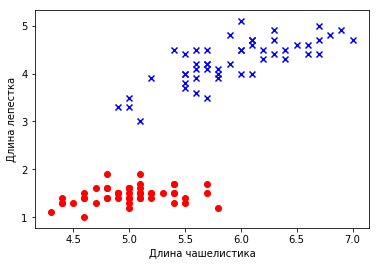

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='щетинистый')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='разноцветный')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.show()

In [9]:
from perceptron import *

In [10]:
print(X[:5])
print(y[:5])

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]
[-1 -1 -1 -1 -1]


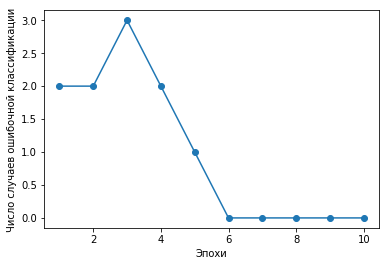

In [14]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случаев ошибочной классификации')
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

In [27]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

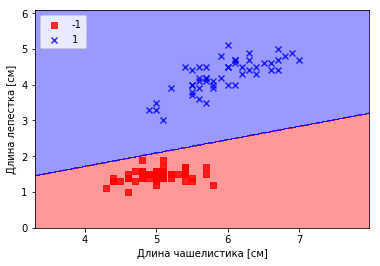

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()